In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter(action='ignore')

In [213]:
train_demographics = pd.read_csv("traindemographics.csv")
train_performance = pd.read_csv("trainperf.csv")
train_prevloans = pd.read_csv("trainprevloans.csv")

test_demographics = pd.read_csv("testdemographics.csv")
test_performance = pd.read_csv("testperf.csv")
test_prevloans = pd.read_csv("testprevloans.csv")

In [214]:
train_performance

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad


In [215]:
print("train_demographics:", train_demographics.shape)
print("train_prevloans.shape:", train_prevloans.shape)
print("train_performance:", train_performance.shape)
print("test_demographics.shape:", test_demographics.shape)

train_demographics: (4346, 9)
train_prevloans.shape: (18183, 12)
train_performance: (4368, 10)
test_demographics.shape: (1487, 9)


In [216]:
train_demographics.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [217]:
train_prevloans = train_prevloans.drop(columns=[ 'systemloanid', 'loannumber', 'approveddate', 'creationdate',
    'loanamount', 'totaldue', 'termdays', 'referredby'])
test_prevloans = test_prevloans.drop(columns=[ 'systemloanid', 'loannumber', 'approveddate', 'creationdate',
    'loanamount', 'totaldue', 'termdays', 'referredby'])

In [218]:
train1 = pd.merge(train_demographics, train_performance, on='customerid', how='inner')
train = pd.merge(train1, train_prevloans, on='customerid', how='inner')

test1 = pd.merge(test_demographics, test_performance, on='customerid', how='inner')
test = pd.merge(test1, test_prevloans, on='customerid', how='inner')

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13693 entries, 0 to 13692
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13693 non-null  object 
 1   birthdate                   13693 non-null  object 
 2   bank_account_type           13693 non-null  object 
 3   longitude_gps               13693 non-null  float64
 4   latitude_gps                13693 non-null  float64
 5   bank_name_clients           13693 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12330 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid                13693 non-null  int64  
 10  loannumber                  13693 non-null  int64  
 11  approveddate                13693 non-null  object 
 12  creationdate                13693 non-null  object 
 13  loanamount                  136

In [220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  1605 non-null   object 
 1   birthdate                   1605 non-null   object 
 2   bank_account_type           1605 non-null   object 
 3   longitude_gps               1605 non-null   float64
 4   latitude_gps                1605 non-null   float64
 5   bank_name_clients           1605 non-null   object 
 6   bank_branch_clients         18 non-null     object 
 7   employment_status_clients   1459 non-null   object 
 8   level_of_education_clients  385 non-null    object 
 9   systemloanid                1605 non-null   int64  
 10  loannumber                  1605 non-null   int64  
 11  approveddate                1605 non-null   object 
 12  creationdate                1605 non-null   object 
 13  loanamount                  1605 

In [221]:
train

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,...,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,closeddate,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962,...,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good,2017-07-04 18:09:47.000000,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172,...,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,NaN,Bad,2017-07-10 08:52:54.000000,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good,2017-07-11 10:12:20.000000,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good,2017-05-27 13:02:53.000000,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good,2017-06-08 11:13:50.000000,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate,301990956,...,2017-07-22 16:07:16.000000,2017-07-22 15:07:02.000000,20000.0,24500.0,30,NaN,Good,2016-07-05 23:59:54.000000,2016-07-01 00:00:00.000000,2016-07-05 23:44:51.000000
13689,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate,301990956,...,2017-07-22 16:07:16.000000,2017-07-22 15:07:02.000000,20000.0,24500.0,30,NaN,Good,2017-06-19 17:03:34.000000,2017-06-26 00:00:00.000000,2017-06-19 16:53:24.000000
13690,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate,301990956,...,2017-07-22 16:07:16.000000,2017-07-22 15:07:02.000000,20000.0,24500.0,30,NaN,Good,2017-03-23 19:19:20.000000,2017-03-24 00:00:00.000000,2017-03-23 19:04:10.000000
13691,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate,301990956,...,2017-07-22 16:07:16.000000,2017-07-22 15:07:02.000000,20000.0,24500.0,30,NaN,Good,2017-05-21 10:07:50.000000,2017-05-22 00:00:00.000000,2017-05-21 09:52:41.000000


In [222]:
train = train.drop(['bank_branch_clients', 'employment_status_clients', 'level_of_education_clients'], axis=1)
test = test.drop(['bank_branch_clients', 'employment_status_clients', 'level_of_education_clients'], axis=1)

In [223]:
date_columns = ['birthdate', 'approveddate', 'creationdate','closeddate', 'firstduedate', 'firstrepaiddate']
for col in date_columns:
    if col in train.columns:
        train[col] = pd.to_datetime(train[col], errors='coerce')
    if col in test.columns:
        test[col] = pd.to_datetime(test[col], errors='coerce')

In [224]:
if "birthdate" in train.columns:
    train["age"] = (pd.Timestamp("today") - train["birthdate"]).dt.days // 365
    test["age"] = (pd.Timestamp("today") - test["birthdate"]).dt.days // 365
train = train.drop(columns=["birthdate"])
test = test.drop(columns=["birthdate"])

In [225]:
if "approveddate" in train.columns and "creationdate" in train.columns:
    train["approval_delay"] = (train["approveddate"] - train["creationdate"]).dt.days
    test["approval_delay"] = (test["approveddate"] - test["creationdate"]).dt.days

In [226]:
if "closeddate" in train.columns and "approveddate" in train.columns:
    train["loan_duration_days"] = (train["closeddate"] - train["approveddate"]).dt.days
    test["loan_duration_days"] = (test["closeddate"] - test["approveddate"]).dt.days

In [227]:
datetime_cols = train.select_dtypes(include=["datetime64[ns]"]).columns
train = train.drop(columns=datetime_cols, errors="ignore")
test = test.drop(columns=datetime_cols, errors="ignore")

In [228]:
train['good_bad_flag'] = train['good_bad_flag'].map({'Good': 1, 'Bad': 0})

In [229]:
X = train.drop(columns=['good_bad_flag','level_of_education_clients', 'bank_branch_clients', 'creationdate', 'approveddate', 'loannumber',"customerid",'referredby', "systemloanid"], errors="ignore")
y = train["good_bad_flag"]

X_test_final = test.drop(columns=["customerid", "systemloanid"], errors="ignore")

In [230]:
X.isna().sum()

bank_account_type     0
longitude_gps         0
latitude_gps          0
bank_name_clients     0
loanamount            0
totaldue              0
termdays              0
age                   0
approval_delay        0
loan_duration_days    0
dtype: int64

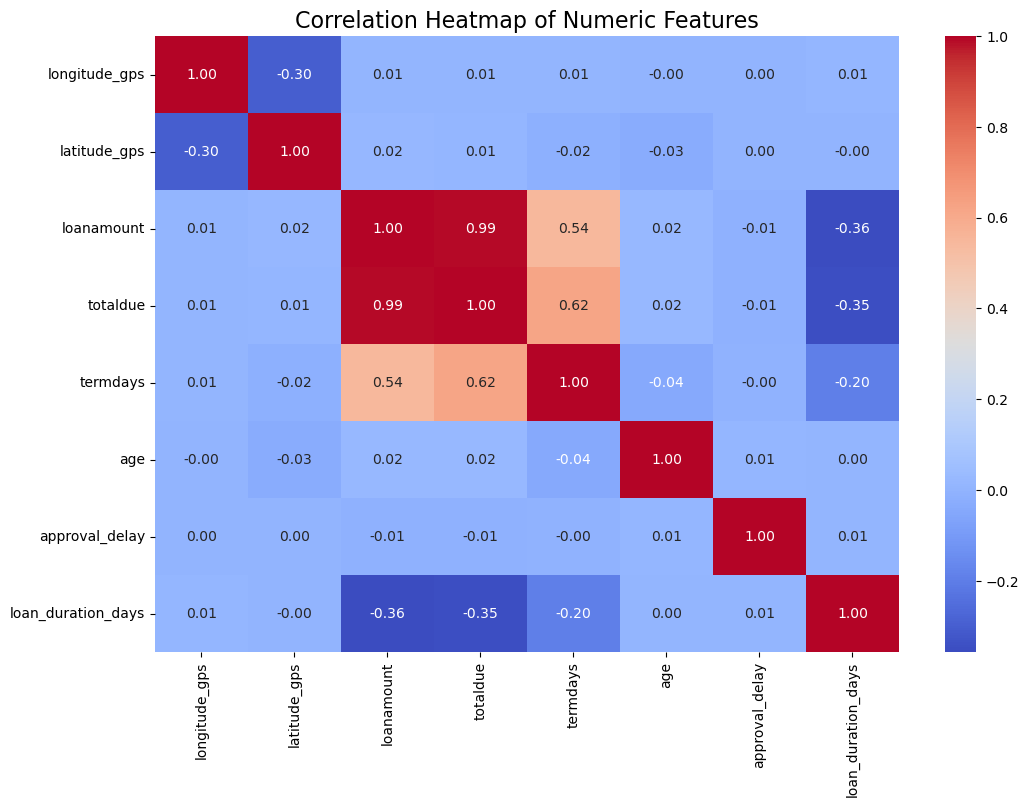

In [231]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
corr = X[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [233]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [234]:
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [235]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)])

In [236]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))])

In [237]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude_gps', 'latitude_gps', 'loanamount', 'totaldue', 'termdays',
       'age', 'approval_delay', 'loan_duration_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['bank_account_type', 'bank_name_clients'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [238]:
y_pred = pipeline.predict(X_val)

In [239]:
print("Logistic_Regresssion_Validation Acc:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Logistic_Regresssion_Validation Acc: 0.8152610441767069

Confusion Matrix:
 [[   0  506]
 [   0 2233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.82      1.00      0.90      2233

    accuracy                           0.82      2739
   macro avg       0.41      0.50      0.45      2739
weighted avg       0.66      0.82      0.73      2739



In [240]:
test_predictions = pipeline.predict(X_test_final)

In [241]:
output = pd.DataFrame({
    "customerid": test["customerid"],
    "prediction": test_predictions})

In [242]:
output.to_csv("submission.csv", index=False)

In [243]:
from sklearn.svm import SVC

In [244]:
SVMpipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", C=1, gamma="scale", probability=True, random_state=42))])

In [245]:
SVMpipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude_gps', 'latitude_gps', 'loanamount', 'totaldue', 'termdays',
       'age', 'approval_delay', 'loan_duration_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['bank_account_type', 'bank_name_clients'], dtype='object'))])),
                ('classifier', SVC(C=1, probability=True, random_state=42))])

In [246]:
SVMy_pred = SVMpipe.predict(X_val)

In [247]:
print("Validation Accuracy:", accuracy_score(y_val, SVMy_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, SVMy_pred))
print("\nClassification Report:\n", classification_report(y_val, SVMy_pred))

Validation Accuracy: 0.8211025921869295

Confusion Matrix:
 [[  16  490]
 [   0 2233]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.06       506
           1       0.82      1.00      0.90      2233

    accuracy                           0.82      2739
   macro avg       0.91      0.52      0.48      2739
weighted avg       0.85      0.82      0.75      2739



In [248]:
svctest_pred = pipeline.predict(X_test_final)

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
Rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200,random_state=42,class_weight="balanced"))])

In [251]:
Rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude_gps', 'latitude_gps', 'loanamount', 'totaldue', 'termdays',
       'age', 'approval_delay', 'loan_duration_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['bank_account_type', 'bank_name_clients'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [252]:
rfy_pred = Rf_model.predict(X_val)

In [253]:
print("Validation Accuracy:", accuracy_score(y_val, rfy_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, rfy_pred))
print("\nClassification Report:\n", classification_report(y_val, rfy_pred))

Validation Accuracy: 0.9587440671778021

Confusion Matrix:
 [[ 405  101]
 [  12 2221]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       506
           1       0.96      0.99      0.98      2233

    accuracy                           0.96      2739
   macro avg       0.96      0.90      0.93      2739
weighted avg       0.96      0.96      0.96      2739



In [254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)

In [255]:
kNn = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', knn)])

In [256]:
kNn.fit(X_train, y_train)
y_pred_knn = kNn.predict(X_val)

In [257]:
print("Validation Accuracy:", accuracy_score(y_val, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_val, y_pred_knn))

Validation Accuracy: 0.8594377510040161

Confusion Matrix:
 [[ 242  264]
 [ 121 2112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       506
           1       0.89      0.95      0.92      2233

    accuracy                           0.86      2739
   macro avg       0.78      0.71      0.74      2739
weighted avg       0.85      0.86      0.85      2739



In [258]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [259]:
lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42,
    class_weight='balanced')

In [260]:
M_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', lgbm)])

In [261]:
M_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 8932, number of negative: 2022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 10954, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude_gps', 'latitude_gps', 'loanamount', 'totaldue', 'termdays',
       'age', 'approval_delay', 'loan_duration_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['bank_account_type', 'bank_name_clients'], dtype='object'))])),
                ('model',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.05,
                                n_estimators=500, random_state=42))])

In [262]:
y_pred_lgbm = clf_lgbm.predict(X_val)
y_proba_lgbm = clf_lgbm.predict_proba(X_val)[:,1]

In [263]:
print("Validation Accuracy:", accuracy_score(y_val, y_pred_lgbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lgbm))

Validation Accuracy: 0.9393939393939394

Confusion Matrix:
 [[ 464   42]
 [ 124 2109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       506
           1       0.98      0.94      0.96      2233

    accuracy                           0.94      2739
   macro avg       0.88      0.93      0.91      2739
weighted avg       0.95      0.94      0.94      2739



In [264]:
from xgboost import XGBClassifier

In [265]:
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1)

In [266]:
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', xgb)])

In [267]:
clf_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude_gps', 'latitude_gps', 'loanamount', 'totaldue', 'termdays',
       'age', 'approval_delay', 'loan_duration_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strat...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [268]:
y_pred_xgb = clf_xgb.predict(X_val)

In [269]:
print("Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb))

Validation Accuracy: 0.9328221978824388

Confusion Matrix:
 [[ 344  162]
 [  22 2211]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79       506
           1       0.93      0.99      0.96      2233

    accuracy                           0.93      2739
   macro avg       0.94      0.83      0.87      2739
weighted avg       0.93      0.93      0.93      2739



In [271]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [272]:
gbc = GradientBoostingClassifier(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=3, 
    random_state=42)

In [275]:
M_gbc = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', gbc)])

In [276]:
M_gbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude_gps', 'latitude_gps', 'loanamount', 'totaldue', 'termdays',
       'age', 'approval_delay', 'loan_duration_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['bank_account_type', 'bank_name_clients'], dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=300,
                                            random_state=42))])

In [279]:
y_pred_gbc = M_gbc.predict(X_val)

In [280]:
print("Validation Accuracy:", accuracy_score(y_val, y_pred_gbc ))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_gbc ))
print("\nClassification Report:\n", classification_report(y_val, y_pred_gbc ))

Validation Accuracy: 0.845929171230376

Confusion Matrix:
 [[  91  415]
 [   7 2226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.18      0.30       506
           1       0.84      1.00      0.91      2233

    accuracy                           0.85      2739
   macro avg       0.89      0.59      0.61      2739
weighted avg       0.86      0.85      0.80      2739



In [282]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'SVM', 'RandomForestClassifier', 'knn', 'lgbm', 'xgb','gbc'],
    'Score': [
        100 * round(accuracy_score(y_val, y_pred), 4),
        100 * round(accuracy_score(y_val, SVMy_pred), 4),
        100 * round(accuracy_score(y_val, rfy_pred), 4),
        100 * round(accuracy_score(y_val, y_pred_knn), 4),
        100 * round(accuracy_score(y_val, y_pred_lgbm), 4),
        100 * round(accuracy_score(y_val, y_pred_xgb), 4),
        100 * round(accuracy_score(y_val, y_pred_gbc), 4)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,RandomForestClassifier,95.87
4,lgbm,93.94
5,xgb,93.28
3,knn,85.94
6,gbc,84.59
1,SVM,82.11
0,LogisticRegression,81.53
